# 1) Загрузите данные по вариантам в ноутбук.

In [1]:
import numpy as np
import pandas as pd

In [2]:
A = pd.read_excel('Вариант 2.xlsx')
A.rename(columns=dict(zip(list(A.columns.values), A.iloc[1])) , inplace=True)
AVG = A.iloc[-1]['Балл']
A = A.drop([0, 1])
A = A[:-1]
A = A.set_index('№')
display(A)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27


## 2) Сделайте описательную статистику полученных данных.

In [16]:
A.groupby(['№ школы']).mean()['Балл']
A.describe()


/var/folders/m1/14txr0yx5_lfmhpzh8mbbdvm0000gn/T/ipykernel_81609/3853007413.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  A.groupby(['№ школы']).mean()['Балл']


,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356,2356,2356,2356,2356,2356,0,2356,2356,2356
unique,17,13,2,32,467,135,0,26,26,1
top,136,11,Ж,343,++++++++++++,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,8,39,27
freq,1020,1798,1245,189,265,1405,NaN,265,265,2356


## 3) Найдите процент учащихся, выполнивших работу ниже среднего.


In [17]:
(A[A['Балл']<A['Балл'].mean()].shape[0])/A.shape[0]*100

48.00509337860781

## 4) Найти процент учащихся не сдавших экзамен.

In [5]:
(A[A['Балл']<A['Минимальный балл']].shape[0])/A.shape[0]*100

9.210526315789473

## 5) Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [6]:
import matplotlib.pyplot as plt


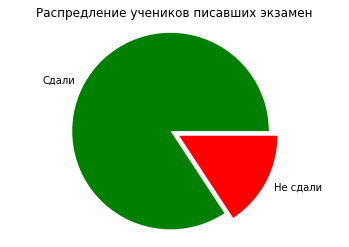

In [7]:
labels = ['Сдали', 'Не сдали']
students = [A[A['Балл'] > A['Минимальный балл']].shape[0], A[A['Балл'] <= A['Минимальный балл']].shape[0]]
colors=['green', 'red']
explode = (0.1, 0)
plt.title('Распредление учеников писавших экзамен')
plt.pie(students, labels=labels, explode=explode, colors=colors)
plt.axis('equal')
plt.show()

## 6) Постройте ядерную оценку плотности распределению баллов за экзамен.

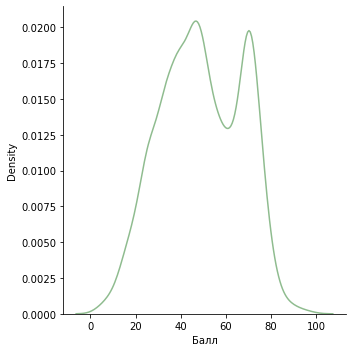

In [8]:
import seaborn as sb
sb.displot(A['Балл'], kind = 'kde', color = 'DarkSeaGreen')


## 7) Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

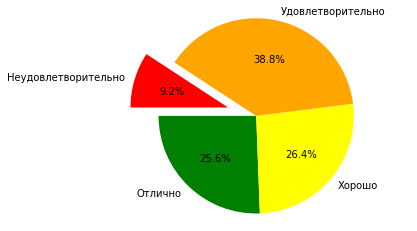

In [9]:
labels = ['Отлично', 'Хорошо', 'Удовлетворительно', 'Неудовлетворительно']
values = [A.loc[(A['Балл'] >= 68)].shape[0],
          A.loc[(A['Балл'] >= 50) & (A['Балл'] < 68)].shape[0],
          A.loc[(A['Балл'] >= A['Минимальный балл']) & (A['Балл'] < 49)].shape[0],
          A.loc[(A['Балл'] < A['Минимальный балл'])].shape[0]]
colors = ['green', 'yellow', 'orange', 'red']
explode = [0, 0, 0, 0.3]
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=180)
plt.axis('equal')
plt.show()

## 8) Какое процентное соотношение юношей и девушек писало данный экзамен?

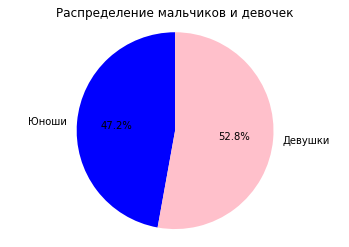

In [10]:
labels = ['Юноши', 'Девушки']
students = [A.loc[(A['Пол'] == 'М')].shape[0], A.loc[(A['Пол'] == 'Ж')].shape[0]]
colors=['blue', 'pink']
explode = (0, 0)
plt.title('Распределение мальчиков и девочек')
plt.pie(students, labels=labels, explode=explode, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')
plt.show()

## 9) Сколько школ принимало участие в экзамене?

In [11]:
len(A['№ школы'].unique())

17

## 10) Сколько всего заданий с кратким ответом? С развернутым ответом?

In [12]:
short =  len(A.iloc[0]['Задания с кратким ответом'])
huge = int(len(A.iloc[0]['Задания с развёрнутым ответом'])/4)
print("Задания с кратким ответом: ", short, "Задания с развернутым ответом: ", huge)

Задания с кратким ответом:  12 Задания с развернутым ответом:  7


## 11) Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ... Вк Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[89.26, 95.33, 92.78, 91.0, 88.5, 73.17, 37.48, 47.84, 91.85, 71.48, 59.25, 46.22]
[10.74, 4.67, 7.22, 9.0, 11.5, 26.83, 62.52, 52.16, 8.15, 28.52, 40.75, 53.78]


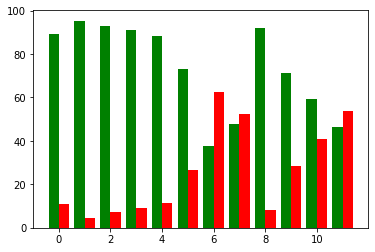

In [18]:
all_B = list(A['Задания с кратким ответом'])
B_done = [0 for i in range(len(all_B[0]))]
print(B_done)

for el in all_B:
    for i in range(len(el)):
        if el[i] == '+':
            B_done[i] += 1
for i in range(len(B_done)):
    B_done[i] = round(B_done[i] / len(all_B) * 100, 2)

B_didt = [round(100 - i, 2) for i in B_done]

groups = [f"B{i}" for i in range(1, len(B_done)+1)]

print(B_done)
print(B_didt)

X_axis = np.arange(len(groups))
plt.bar(X_axis - 0.2, B_done, 0.4, color='green')
plt.bar(X_axis + 0.2, B_didt, 0.4, color='red')
#plt.xticks(X_axis, groups)
plt.show()

## 12) Аналогично и с типом С (ответы с развернутым ответом)


In [14]:
display(A)

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27


[33.91, 15.87, 15.58, 2.72, 3.4, 1.1, 3.4]
[66.09, 84.13, 84.42, 97.28, 96.6, 98.9, 96.6]


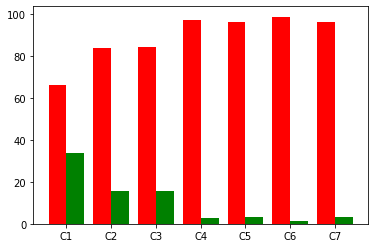

In [15]:
ls_c = list(A['Задания с развёрнутым ответом'])
c_done = [0 for i in range(int(len(ls_c[0])/4))]
for pt in ls_c:
    for i in range(len(pt)):
        if i%4==0 and pt[i]!='0':
            c_done[i//4]+=1
for i in range(len(c_done)):
    c_done[i]= round((c_done[i] / len(ls_c) * 100), 2)

c_not = [round((100 - c_done[i]), 2) for i in range(len(c_done))]

tasks = [f'C{i}' for i in range(1, len(c_done)+1)]
print(c_done)
print(c_not)

x_ax = np.arange(len(tasks))
plt.bar(x_ax+0.2, c_done, 0.4, color='green')
plt.bar(x_ax-0.2, c_not, 0.4, color='red')
plt.xticks(x_ax, tasks)
plt.show()


## 13) Сделайте анализ по двум школам:
### 1)по всем выполненным заданиям типа В
### 2)по заданиям типа С больше 50%
### 3)по среднему баллу юношей и девушек

In [61]:
A_st = A.loc[(A['№ школы'] == 125) | (A['№ школы'] == 123)]
B_school = []
for el in list(A_st['Задания с кратким ответом']):
    B_school.append(round(el.count('+') / len(el) * 100, 2))
print('Процент выполнения задания В каждый учеником школы №124 и школы №123:')
print(B_school)

Процент выполнения задания В каждый учеником школы №124 и школы №123:
[25.0, 25.0, 33.33, 33.33, 33.33, 33.33, 41.67, 41.67, 41.67, 41.67, 41.67, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 58.33, 58.33, 50.0, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 75.0, 75.0, 66.67, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 66.67, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 83.33, 83.33, 75.0, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 83.33, 66.67, 83.33, 83.33, 83.33, 83.33, 75.0, 83.33, 66.67, 83.33, 91.67, 75.0, 91.67, 91.67, 91.67, 75.0, 91.67, 91.67, 91.67, 66.67, 100.0, 83.33, 83.33, 100.0, 83.33, 83.33, 100.0, 83.33, 83.33, 83.33, 83.33,

In [62]:
A_st = A.loc[(A['№ школы'] == 125) | (A['№ школы'] == 123)]
С_school = []
for el in list(A_st['Задания с развёрнутым ответом']):
    temp = 0
    for i in range(len(el)):
        if i%4 == 0: 
            if int(el[i]) >= int(int(el[i+2])/2):
                temp += 1
    С_school.append(round(temp/(len(el)/4)*100))
print('Процент выполнения заданий С больще 50% каждый учеником школы №124 и школы №123:')            
print(С_school)

Процент выполнения заданий С больще 50% каждый учеником школы №124 и школы №123:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 14, 0, 14, 0, 0, 14, 0, 0, 0, 14, 0, 0, 0, 29, 0, 14, 14, 0, 14, 14, 0, 14, 14, 14, 14, 14, 14, 14, 14, 0, 14, 43, 29, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 29, 14, 29, 29, 29, 14, 14, 29, 14, 14, 14, 14, 29, 29, 29, 29, 14, 29, 29, 29, 29, 29, 43, 43, 29, 43, 57, 43, 57]


In [63]:
A_st = A.loc[(A['№ школы'] == 125) | (A['№ школы'] == 123)]
print('Средний балл девушек школы №124 и школы №123:')
print(round(A_st[A_st['Пол']=='Ж'].mean()['Балл'], 2))
print('Средний балл юношей школы №124 и школы №123:')
print(round(A_st[A_st['Пол']=='М'].mean()['Балл'], 2))

Средний балл девушек школы №124 и школы №123:
50.12
Средний балл юношей школы №124 и школы №123:
48.05


/var/folders/m1/14txr0yx5_lfmhpzh8mbbdvm0000gn/T/ipykernel_76827/2186248008.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(round(A_st[A_st['Пол']=='Ж'].mean()['Балл'], 2))
/var/folders/m1/14txr0yx5_lfmhpzh8mbbdvm0000gn/T/ipykernel_76827/2186248008.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(round(A_st[A_st['Пол']=='М'].mean()['Балл'], 2))


## 14) Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.

In [64]:
Bs = []
for el in list(A['Задания с кратким ответом']):
    temp = []
    for i in el:
        temp.append(i)
    Bs.append(temp)
for i in range(len(Bs)):
    Bs[i].append(list(A.index)[i])
B_plus = pd.DataFrame(Bs, columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', '№'])
B_plus = B_plus.set_index('№')
result = pd.concat([A, B_plus], axis=1, join='inner')
pd.set_option('display.max_columns', 200)
result.head(10)
cols = result.columns.tolist()
result = result[cols[:4] + cols[10:] + cols[6:10]]
result

,№ школы,Класс,Пол,Номер варианта,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,,,,,,,,,,,
1,124,11,Ж,341,-,-,-,-,-,-,+,-,-,-,-,-,NaN,1,5,27
2,128,11,Ж,345,-,+,-,-,-,-,-,-,-,-,-,-,NaN,1,5,27
3,132,11,Ж,340,-,+,-,-,-,-,-,-,-,-,-,-,NaN,1,5,27
4,134,11,Ж,339,-,+,-,-,-,-,-,-,-,-,-,-,NaN,1,5,27
5,136,11,Ж,348,-,-,-,-,-,-,-,-,+,-,-,-,NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,+,+,+,+,+,+,+,+,+,+,+,+,NaN,25,92,27
2353,136,11,М,341,+,+,-,+,+,+,+,+,+,+,+,+,NaN,25,92,27
2354,136,11,М,341,+,+,+,+,+,+,+,+,+,+,+,+,NaN,27,96,27


In [65]:
Cs = []
for el in list(A['Задания с развёрнутым ответом']):
    temp = []
    for i in range(len(el)):
        if i%4==0:
            temp.append(el[i])
            temp.append(el[i+2])
    Cs.append(temp)
for i in range(len(Cs)):
    Cs[i].append(list(A.index)[i])
C_plus = pd.DataFrame(Cs, columns = ['C1', 'C1 max', 'C2', 'C2 max', 'C3', 'C3 max', 'C4', 'C4 max', 'C5', 'C5 max', 'C6', 'C6 max', 'C7', 'C7 max',  '№'])
C_plus = C_plus.set_index('№')
result_end = pd.concat([result, C_plus], axis=1, join='inner')
cols = result_end.columns.tolist()
result_end = result_end[cols[:16] + cols[20:] + cols[16:20]]
result_end

,№ школы,Класс,Пол,Номер варианта,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,C1,C1 max,C2,C2 max,C3,C3 max,C4,C4 max,C5,C5 max,C6,C6 max,C7,C7 max,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,124,11,Ж,341,-,-,-,-,-,-,+,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
2,128,11,Ж,345,-,+,-,-,-,-,-,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
3,132,11,Ж,340,-,+,-,-,-,-,-,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
4,134,11,Ж,339,-,+,-,-,-,-,-,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
5,136,11,Ж,348,-,-,-,-,-,-,-,-,+,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,+,+,+,+,+,+,+,+,+,+,+,+,2,2,2,2,2,2,3,3,3,3,0,4,1,4,NaN,25,92,27
2353,136,11,М,341,+,+,-,+,+,+,+,+,+,+,+,+,2,2,2,2,1,2,2,3,2,3,4,4,1,4,NaN,25,92,27
2354,136,11,М,341,+,+,+,+,+,+,+,+,+,+,+,+,2,2,1,2,2,2,1,3,3,3,4,4,2,4,NaN,27,96,27
